<h1> Классификация спама в e-mail сообщениях

<h2> Постановка задачи:</h2>
<p>Дан датасет - сообщения и пометка, является ли это сообщение спамом (957 сообщений на тренировочной выборке и 125 на тестовой). Цель задачи - научиться автоматически помечать сообщения со спамом.</p>

<h3> Читаем тренировочные данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np          
import seaborn as sns         
import sklearn
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


train_dataset = []
test_dataset = []
dataset = []

train_dataset = pd.read_csv("archive/SMS_train.csv", sep=',', encoding="Windows-1252")
test_dataset = pd.read_csv("archive/SMS_test.csv", sep=',', encoding="Windows-1252")

dataset = pd.concat((train_dataset, test_dataset), ignore_index=True)
#dataset = train_dataset

[nltk_data] Downloading package punkt to /home/mievst/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mievst/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3> Взглянем на информацию о датасете

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset.shape

(1082, 3)

In [4]:
dataset.head(10)

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
5,6,REMINDER FROM O2: To get 2.50 pounds free call...,Spam
6,7,Huh y lei...,Non-Spam
7,8,Why don't you wait 'til at least wednesday to ...,Non-Spam
8,9,Ard 6 like dat lor.,Non-Spam
9,10,Ok lor... Sony ericsson salesman... I ask shuh...,Non-Spam


In [5]:
dataset.tail(10)

,S. No.,Message_body,Label
1072,116,I'm awake oh. What's up.,Non-Spam
1073,117,Think + da. You wil do.,Non-Spam
1074,118,PISS IS TALKING IS SOMEONE THAT REALISE U THAT...,Non-Spam
1075,119,I am in hospital da. . I will return home in e...,Non-Spam
1076,120,Gettin rdy to ship comp,Non-Spam
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
1081,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        1082 non-null   int64 
 1   Message_body  1082 non-null   object
 2   Label         1082 non-null   object
dtypes: int64(1), object(2)
memory usage: 25.5+ KB


<h3> Получаем набор всех слов встречающихся в выборке (Составляем "Мешок слов")

In [7]:
tokens = []


for xl in dataset["Message_body"]:
    token = nltk.word_tokenize(str(xl).lower())
    token = [t for t in token if len(t) > 2]
    for t in token:
        tokens.append(t)
tokens = set(tokens)
tokens = list(tokens)

In [8]:
def gram_tokens(tokens, gram = 2):
    if gram > 1:
        t = []
        for i in range(len(tokens) - gram + 1): 
            t += [" ".join(tokens[i:i + gram])]
        return t

def process_tokens(tokens, stem = True, stop_words = True):
    if stop_words:
        sw = stopwords.words("english")
        tokens = [token for token in tokens if token not in sw]
    if stem:
        stemmer = nltk.PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]
    return tokens

In [9]:
#tokens = gram_tokens(tokens, 2)
tokens = process_tokens(tokens, True, True)

In [10]:
#количество неповторяющихся слов
tokens.__len__()

3428

<h3> Обрабатываем датасет. Теперь для каждой записи указано сколько раз встречается то или иное слово в сообщении

In [11]:
from collections import Counter

def bag_of_words(tokens, dataset):
    df = pd.DataFrame(dataset)
    for index, row in dataset.iterrows():
        msg_tokens = nltk.word_tokenize(str(row["Message_body"]).lower())
        msg_tokens = [t for t in msg_tokens if len(t) > 2]
        #msg_tokens = gram_tokens(msg_tokens, 2)
        msg_tokens = process_tokens(msg_tokens, True, True)
        count_letter = Counter(msg_tokens)
        for token in tokens:
            df.loc[index, token] = count_letter[token]
    return df.copy()

df = bag_of_words(tokens, dataset)


df.drop("Message_body", axis=1, inplace=True)

In [12]:
df.drop("S. No.", axis=1, inplace=True)

<h3> Вот так теперь выглядит датасет

In [13]:
df.head(10)

,Label,hmmmm,store,someth,soz,mayb,6time,89545,quot,wyli,...,gettin,7.30.,woken,traffic,customercar,prolli,80182,8077,soon,least
0,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Non-Spam,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Non-Spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Columns: 3042 entries, Label to least
dtypes: float64(3041), object(1)
memory usage: 25.1+ MB


In [15]:
df.iloc[:,0] = df.iloc[:,0].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Columns: 3042 entries, Label to least
dtypes: category(1), float64(3041)
memory usage: 25.1 MB


<h3> Сводная таблица по количественным признакам встречающихся слов

In [17]:
df.describe()

,hmmmm,store,someth,soz,mayb,6time,89545,quot,wyli,//www.vouch4me.com/etlp/dining.asp,...,gettin,7.30.,woken,traffic,customercar,prolli,80182,8077,soon,least
count,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,...,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000
mean,0.000924,0.001848,0.012939,0.000924,0.012939,0.000924,0.001848,0.002773,0.001848,0.000924,...,0.000924,0.000924,0.000924,0.000924,0.000924,0.000924,0.000924,0.000924,0.013863,0.004621
std,0.030401,0.042973,0.120969,0.030401,0.113064,0.030401,0.042973,0.052607,0.042973,0.030401,...,0.030401,0.030401,0.030401,0.030401,0.030401,0.030401,0.030401,0.030401,0.124635,0.067853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


<h3> Сводная таблица по категориям сообщений

In [18]:
df.describe(include = ['category'])

,Label
count,1082
unique,2
top,Non-Spam
freq,884


<h3> Строим корреляционную матрицу

In [19]:
corr_matrix = df.corr()
corr_matrix

,hmmmm,store,someth,soz,mayb,6time,89545,quot,wyli,//www.vouch4me.com/etlp/dining.asp,...,gettin,7.30.,woken,traffic,customercar,prolli,80182,8077,soon,least
hmmmm,1.000000,-0.001309,-0.003255,-0.000925,-0.003482,-0.000925,-0.001309,-0.001604,-0.001309,-0.000925,...,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,-0.003385,-0.002072
store,-0.001309,1.000000,-0.004605,-0.001309,-0.004927,-0.001309,-0.001852,-0.002269,-0.001852,-0.001309,...,-0.001309,-0.001309,-0.001309,-0.001309,-0.001309,-0.001309,-0.001309,-0.001309,-0.004789,-0.002932
someth,-0.003255,-0.004605,1.000000,-0.003255,0.123020,-0.003255,-0.004605,-0.005643,-0.004605,-0.003255,...,-0.003255,-0.003255,-0.003255,-0.003255,-0.003255,-0.003255,-0.003255,-0.003255,0.049448,-0.007291
soz,-0.000925,-0.001309,-0.003255,1.000000,-0.003482,-0.000925,-0.001309,-0.001604,-0.001309,-0.000925,...,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,-0.003385,-0.002072
mayb,-0.003482,-0.004927,0.123020,-0.003482,1.000000,-0.003482,-0.004927,-0.006037,-0.004927,-0.003482,...,-0.003482,-0.003482,-0.003482,-0.003482,-0.003482,-0.003482,-0.003482,-0.003482,-0.012741,-0.007801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
prolli,-0.000925,-0.001309,-0.003255,-0.000925,-0.003482,-0.000925,-0.001309,-0.001604,-0.001309,-0.000925,...,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,1.000000,-0.000925,-0.000925,-0.003385,-0.002072
80182,-0.000925,-0.001309,-0.003255,-0.000925,-0.003482,-0.000925,-0.001309,-0.001604,-0.001309,-0.000925,...,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,1.000000,-0.000925,-0.003385,-0.002072
8077,-0.000925,-0.001309,-0.003255,-0.000925,-0.003482,-0.000925,-0.001309,-0.001604,-0.001309,-0.000925,...,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,-0.000925,1.000000,-0.003385,-0.002072
soon,-0.003385,-0.004789,0.049448,-0.003385,-0.012741,-0.003385,-0.004789,-0.005868,-0.004789,-0.003385,...,-0.003385,-0.003385,-0.003385,-0.003385,-0.003385,-0.003385,-0.003385,-0.003385,1.000000,-0.007582


<AxesSubplot:>

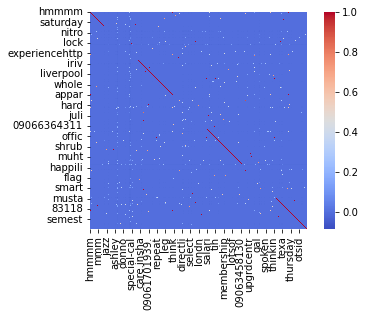

In [20]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')

Визуализировав корреляционную матрицу мы видим связь между некоторыми словами.

<h3> Данные являются несбалансированными

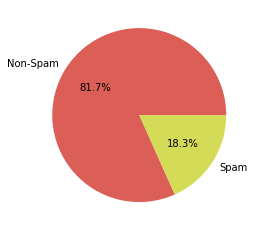

In [61]:
plt.pie(df.Label.value_counts(), labels = ["Non-Spam", "Spam"], colors = sns.color_palette("hls"), autopct = '%1.1f%%')
pass

<h3> Визуализируем какие слова чаще всего используются в сообщениях со спамом

Для поиска таких слов воспользуемся библиотекой WordCloud

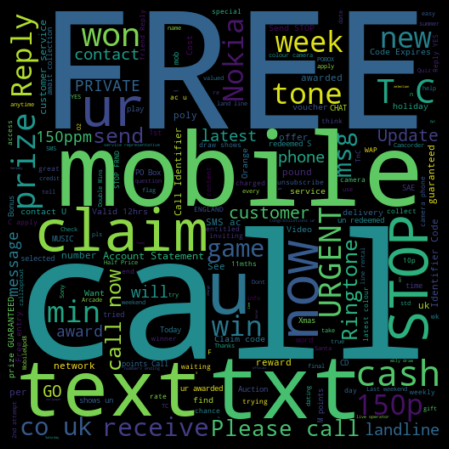

In [22]:
from wordcloud import WordCloud

text = " ".join(list(dataset[dataset["Label"] == "Spam"]["Message_body"]))

# Generate a word cloud image
wordcloud = WordCloud(width = 512,height = 512).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

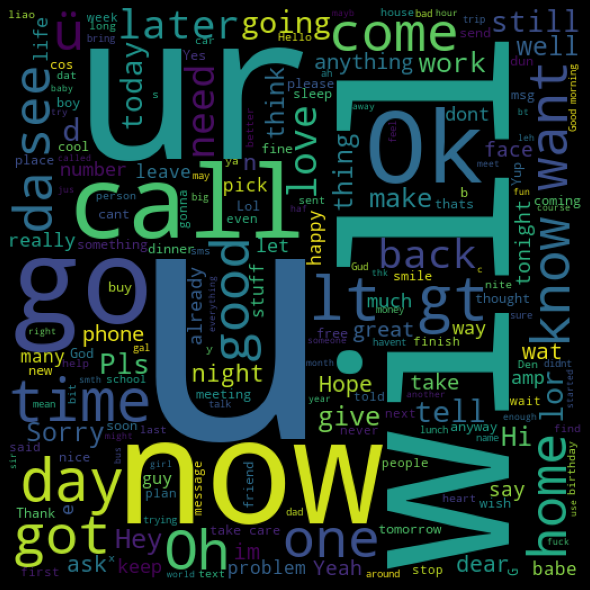

In [23]:
ham_words = ' '.join(list(dataset[dataset["Label"] == "Non-Spam"]["Message_body"]))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

<h3> Нормализуем данные

In [24]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'category']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'category']

In [25]:
for col_num in numerical_columns:
    if  not df[col_num].std(axis = 0):
        print(df[col_num])
        df.drop(col_num, axis=1, inplace=True)
        numerical_columns.remove(col_num)

In [26]:
data_numerical = df[numerical_columns]
data_numerical.describe()

,hmmmm,store,someth,soz,mayb,6time,89545,quot,wyli,//www.vouch4me.com/etlp/dining.asp,...,gettin,7.30.,woken,traffic,customercar,prolli,80182,8077,soon,least
count,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,...,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000
mean,0.000924,0.001848,0.012939,0.000924,0.012939,0.000924,0.001848,0.002773,0.001848,0.000924,...,0.000924,0.000924,0.000924,0.000924,0.000924,0.000924,0.000924,0.000924,0.013863,0.004621
std,0.030401,0.042973,0.120969,0.030401,0.113064,0.030401,0.042973,0.052607,0.042973,0.030401,...,0.030401,0.030401,0.030401,0.030401,0.030401,0.030401,0.030401,0.030401,0.124635,0.067853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [27]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,hmmmm,store,someth,soz,mayb,6time,89545,quot,wyli,//www.vouch4me.com/etlp/dining.asp,...,gettin,7.30.,woken,traffic,customercar,prolli,80182,8077,soon,least
count,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,...,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03
mean,-5.733117e-16,1.043015e-16,-5.437220e-16,-2.229360e-16,-1.995734e-17,-1.080595e-17,3.270643e-18,-5.043075e-16,2.321644e-16,8.544074e-17,...,-2.780752e-16,-2.523462e-16,7.219784e-17,-4.824904e-16,-3.399545e-17,-2.698024e-16,-5.694767e-18,1.052826e-16,7.516066e-18,2.921518e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.040090e-02,-4.301326e-02,-1.069612e-01,-3.040090e-02,-1.144399e-01,-3.040090e-02,-4.301326e-02,-5.270467e-02,-4.301326e-02,-3.040090e-02,...,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-1.112308e-01,-6.810459e-02
25%,-3.040090e-02,-4.301326e-02,-1.069612e-01,-3.040090e-02,-1.144399e-01,-3.040090e-02,-4.301326e-02,-5.270467e-02,-4.301326e-02,-3.040090e-02,...,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-1.112308e-01,-6.810459e-02
50%,-3.040090e-02,-4.301326e-02,-1.069612e-01,-3.040090e-02,-1.144399e-01,-3.040090e-02,-4.301326e-02,-5.270467e-02,-4.301326e-02,-3.040090e-02,...,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-1.112308e-01,-6.810459e-02
75%,-3.040090e-02,-4.301326e-02,-1.069612e-01,-3.040090e-02,-1.144399e-01,-3.040090e-02,-4.301326e-02,-5.270467e-02,-4.301326e-02,-3.040090e-02,...,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-3.040090e-02,-1.112308e-01,-6.810459e-02
max,3.286337e+01,2.322716e+01,1.642618e+01,3.286337e+01,8.730132e+00,3.286337e+01,2.322716e+01,1.895611e+01,2.322716e+01,3.286337e+01,...,3.286337e+01,3.286337e+01,3.286337e+01,3.286337e+01,3.286337e+01,3.286337e+01,3.286337e+01,3.286337e+01,1.593566e+01,1.466973e+01


In [28]:
data = pd.concat((data_numerical, df['Label']), axis = 1)

In [29]:
X = data.drop('Label', axis = 1)
y = data['Label']

<h3> Разбиваем данные на тренировочную и тестовую выборку

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 50)

In [31]:
X_train

,hmmmm,store,someth,soz,mayb,6time,89545,quot,wyli,//www.vouch4me.com/etlp/dining.asp,...,gettin,7.30.,woken,traffic,customercar,prolli,80182,8077,soon,least
708,-0.030401,-0.043013,-0.106961,-0.030401,-0.114440,-0.030401,-0.043013,-0.052705,-0.043013,-0.030401,...,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.111231,-0.068105
316,-0.030401,-0.043013,-0.106961,-0.030401,-0.114440,-0.030401,-0.043013,-0.052705,-0.043013,-0.030401,...,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.111231,-0.068105
285,-0.030401,-0.043013,-0.106961,-0.030401,-0.114440,-0.030401,-0.043013,-0.052705,-0.043013,-0.030401,...,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,7.912216,-0.068105
524,-0.030401,-0.043013,-0.106961,-0.030401,-0.114440,-0.030401,-0.043013,-0.052705,-0.043013,-0.030401,...,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.111231,-0.068105
418,-0.030401,-0.043013,-0.106961,-0.030401,-0.114440,-0.030401,-0.043013,-0.052705,-0.043013,-0.030401,...,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.111231,-0.068105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,-0.030401,-0.043013,-0.106961,-0.030401,8.730132,-0.030401,-0.043013,-0.052705,-0.043013,-0.030401,...,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.111231,-0.068105
229,-0.030401,-0.043013,-0.106961,-0.030401,-0.114440,-0.030401,-0.043013,-0.052705,-0.043013,-0.030401,...,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.111231,-0.068105
70,-0.030401,-0.043013,-0.106961,-0.030401,-0.114440,-0.030401,-0.043013,-0.052705,-0.043013,-0.030401,...,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.111231,-0.068105
132,-0.030401,-0.043013,-0.106961,-0.030401,-0.114440,-0.030401,-0.043013,-0.052705,-0.043013,-0.030401,...,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.030401,-0.111231,-0.068105


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.metrics import plot_confusion_matrix

<h3> Попробуем метод ближайших соседей с разным количеством соседей

In [33]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=1)
Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.1834862385321101


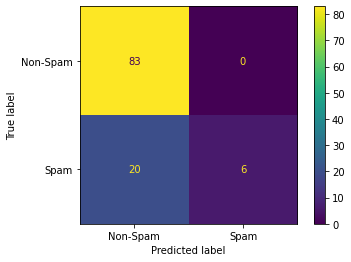

In [34]:
plot_confusion_matrix(knn, X_test, y_test)

In [35]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=2)
Ошибка на обучающей выборке:  0.14285714285714285
Ошибка на тестовой выборке:  0.23853211009174313


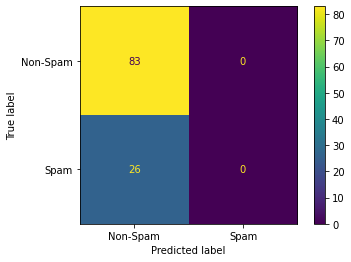

In [36]:
plot_confusion_matrix(knn, X_test, y_test)

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=3)
Ошибка на обучающей выборке:  0.14182939362795477
Ошибка на тестовой выборке:  0.23853211009174313


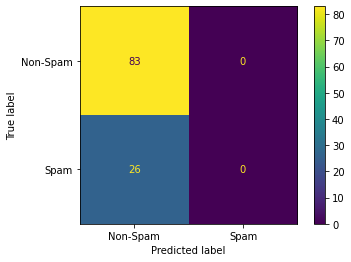

In [38]:
plot_confusion_matrix(knn, X_test, y_test)

In [39]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier()
Ошибка на обучающей выборке:  0.16032887975334018
Ошибка на тестовой выборке:  0.23853211009174313


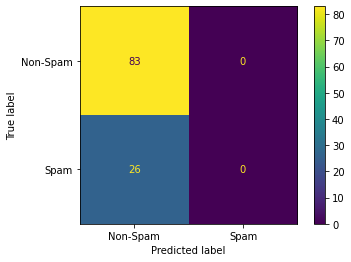

In [40]:
plot_confusion_matrix(knn, X_test, y_test)

In [41]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=8)
Ошибка на обучающей выборке:  0.17677286742034942
Ошибка на тестовой выборке:  0.23853211009174313


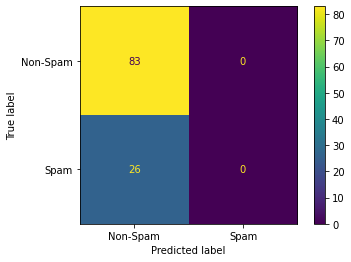

In [42]:
plot_confusion_matrix(knn, X_test, y_test)

In [43]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=13)
Ошибка на обучающей выборке:  0.17677286742034942
Ошибка на тестовой выборке:  0.23853211009174313


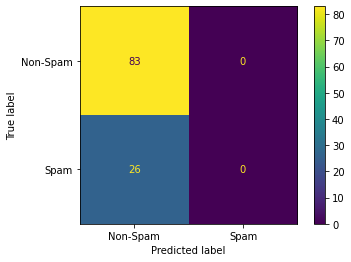

In [44]:
plot_confusion_matrix(knn, X_test, y_test)

In [45]:
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=21)
Ошибка на обучающей выборке:  0.17677286742034942
Ошибка на тестовой выборке:  0.23853211009174313


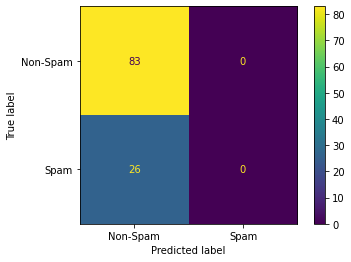

In [46]:
plot_confusion_matrix(knn, X_test, y_test)

In [47]:
knn = KNeighborsClassifier(n_neighbors = 34)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=34)
Ошибка на обучающей выборке:  0.17677286742034942
Ошибка на тестовой выборке:  0.23853211009174313


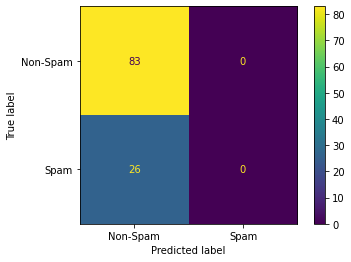

In [48]:
plot_confusion_matrix(knn, X_test, y_test)

<h3> Найдём оптимальное количество соседей

In [49]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 100)}, cv = 5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('Кросс-валидационная ошибка: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Кросс-валидационная ошибка:  0.1500237906423474
Оптимальное количество соседей:  1


<h3> Support Vector Machine

In [50]:
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0041109969167523125
Ошибка на тестовой выборке:  0.1834862385321101


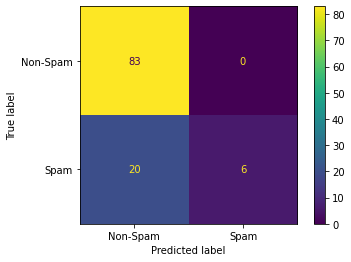

In [51]:
plot_confusion_matrix(svc, X_test, y_test)

<h3> Random Forest

In [52]:
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.09174311926605505


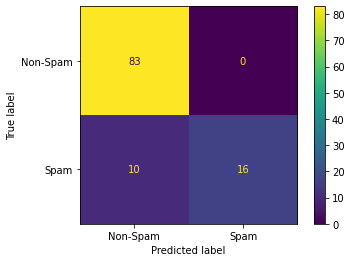

In [53]:
plot_confusion_matrix(rf, X_test, y_test)

<h3> Extremely Randomized Trees

In [54]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.06422018348623854


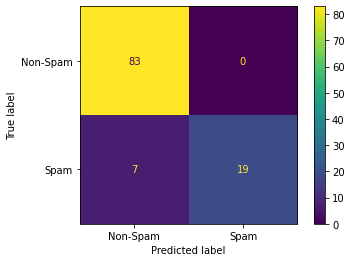

In [55]:
plot_confusion_matrix(ert, X_test, y_test)

<h3> AdaBoost

In [56]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.06422018348623854


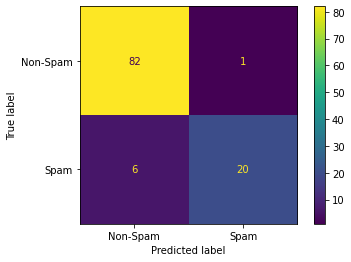

In [57]:
plot_confusion_matrix(ada, X_test, y_test)

<h3> GBT

In [58]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.015416238437821172
Ошибка на тестовой выборке:  0.06422018348623854


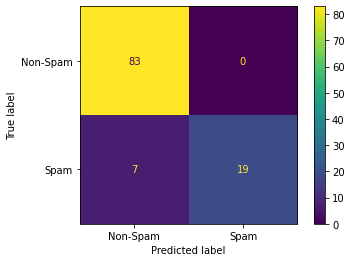

In [59]:
plot_confusion_matrix(gbt, X_test, y_test)

<h1> Выводы

<h3> По данным </h3>
<ui>
<li> Данные являются <b>несбалансированными</b> (81.7 / 18.3)
<li> Большинство сообщений является спамом
<li> Чаще всего в спаме встречаются слова: <code>free</code>, <code>call</code>, <code>mobile</code>, <code>text</code>, <code>claim</code>
</ui>

<h3> По результатам работы алгоритмов </h3>
<ui>
<li>Алгоритм kNN оптимальное количество соседей составило 1 с ошибкой на обучающей выборке ~ 0% и с ошибкой на тестовой выборке - 18.3%
<li>Алгоритм Support Vector Machine: ошибка на обучающей выборке - 0.4%, ошибка на тестовой выборке ~ 18.3%
<li>Алгоритм Random Forest: ошибка на обучающей выборке - 0%, ошибка на тестовой выборке ~ 9.17%
<li>Алгоритм Extremely Randomized Trees: ошибка на обучающей выборке - 0%, ошибка на тестовой выборке ~ 7.3%
<li>Алгоритм AdaBoost: ошибка на обучающей выборке - 0%, ошибка на тестовой выборке ~ 6.4%
<li>Алгоритм GBT: ошибка на обучающей выборке - 1.5%, ошибка на тестовой выборке ~ 6.4%
<li>Лучше всего на тестовой выборке себя показали алгоритмы Extremely Randomized Trees, AdaBoost и GBT с ошибкой в 6.4%, однако при использовании алгоритма GBT на обучающей выборке ошибка 1.5% в то время как у алгоритма AdaBoost и Extremely Randomized Trees она равна 0%
<ui>